Лабораторная работа 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
def plot_verticles(vertices, isosurf = False, filename = None):
    # Create a new plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = [v[0] for v in vertices]
    y = [v[1] for v in vertices]
    z = [v[2] for v in vertices]    
    if isosurf:
        ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)
    else:
        ax.scatter(x, y, z, c='r', marker='o')    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    # Show or save the plot
    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)


def plot_mesh(
    your_mesh, 
    size_x=10, 
    size_y=10, 
    dpi=80, 
    filename = None
    ):
    # Create a new plot
    figure = plt.figure(figsize=(size_x, size_y), dpi=dpi)
    #axes = mplot3d.Axes3D(figure, auto_add_to_figure=False)
    axes = mplot3d.Axes3D(figure)
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors, edgecolor="black"))
    figure.add_axes(axes)
    # Auto scale to the mesh size
    scale = your_mesh.points.flatten()
    axes.auto_scale_xyz(scale, scale, scale)
    # Show or save the plot
    if filename is None:
        plt.show()
    else:
        #matplotlib.use('Agg')
        plt.savefig(filename)

## Введение

разберемся с тем, как можно рисовать трехмерные графики функции (поверхности), а также какие настройки внешнего вида существуют.

Кроме библиотеки Matplotlib нам понадобится математическая библиотека numpy, так как некоторые методы классов рисования трехмерных графиков в качестве параметров ожидают экземпляры класса numpy.array, да и сама библиотека Numpy позволяет значительно сократить количество строк кода.


Первый трехмерный график
Для того, чтобы нарисовать трехмерный график, в первую очередь надо создать трехмерные оси. Для этого выполним короткий пример:



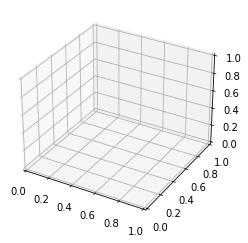

In [3]:
import matplotlib.pyplot as plt


if __name__ == '__main__':
    fig = plt.figure()
    axes = fig.add_subplot(projection='3d')

    plt.show()


## Исходник

Чтобы создать трехмерные оси, сначала мы создаем с помощью функции figure() экземпляр класса matplotlib.figure.Figure. Затем у экземпляра этого класса вызывается метод add_subplot(), который может принимать различное количество параметров, но в данном случае мы передаем один именованный параметр - projection, который описывает тип осей. Для создания трехмерных осей значение параметра projection должно быть строкой "3d". В результате мы получим экземпляр класса осей, с которым мы будем работать в дальнейшем. Этот экземпляр принадлежит к классу, производному от Axes3D (строго говоря он имеет класс matplotlib.axes._subplots.Axes3DSubplot, но этот класс создается динамически в недрах библиотеки, поэтому его нет в документации). Через экземпляр этого класса мы будем рисовать графики и настраивать его внешний вид.

В результате выполнения приведенного выше скрипта мы увидим следующее окно с трехмерными осями, но пока без графика

## 3D
Для всех примеров мы будем использовать следующую функцию, от двух координат.


Для начала нужно подготовить данные для рисования. Нам понадобятся три двумерные матрицы: матрицы X и Y будут хранить координаты сетки точек, в которых будет вычисляться приведенная выше функция, а матрица Z будет хранить значения этой функции в соответствующей точке.

Сначала нужно подготовить прямоугольную сетку на плоскости XY, в узлах которой будут рассчитываться значения отображаемой функции (значение по оси Z). Для создания такой сетки можно воспользоваться функцией numpy.meshgrid(). Эта функция, в простейшем случае, принимает несколько одномерных массивов. Нам нужно два массива для осей X и Y, которые содержат значения координат узлов вдоль соответствующей оси, и могут иметь разный размер. Эта функция возвратит в нашем случае две двумерные матрицы, описывающие координаты X и Y на двумерной сетке. Первая матрица будет создана размножением первого переданного параметра в функцию numpy.meshgrid() вдоль строк первой возвращаемой матрицы, а вторая матрица создается размножением второго переданного одномерного массива вдоль столбцов второй матрицы.

Работа этой функции показана в документации к numpy на простом примере:

In [4]:
X, Y = np.meshgrid([1,2,3], [4,5,6,7])
X,Y


(array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6],
        [7, 7, 7]]))

Теперь по индексу узла сетки мы можем узнать реальные координаты: X[0][0] = 1, Y[0][0] = 4 и т.п. Такие двумерные матрицы позволяют очень легко рассчитывать значения функций от двух аргументов, используя поэлементные операции (векторизацию), это будет показано в следующем блоке кода. И кроме того, эти же матрицы требуются для рисования трехмерных поверхностей в Matplotlib.

Чтобы отделить подготовку данных от самого рисования, создание сетки и расчет функции выделим в отдельную функцию:

In [5]:
def makeData ():
    # Строим сетку в интервале от -10 до 10, имеющую 100 отсчетов по обоим координатам
    x = np.linspace (-10, 10, 100)
    y = np.linspace (-10, 10, 100)

    # Создаем двумерную матрицу-сетку
    xgrid, ygrid = np.meshgrid(x, y)

    # В узлах рассчитываем значение функции
    z = np.sin (xgrid) * np.sin (ygrid) / (xgrid * ygrid)
    return xgrid, ygrid, z

Эта функция возвращает три двумерные матрицы: x, y, z. Координаты x и y лежат на отрезке от -10 до 10 с шагом 0.1. Для задания интервала по осям X и Y мы воспользовались функцией numpy.linspace(), которая создает одномерный массив со значениями из заданного интервала [-10; 10] с указанным количеством отсчетов в нет (в нашем случае - 100). По умолчанию правый конец интервала также включается в результат (если правый конец не нужно включать в результат, то можно передать параметр endpoint, равный False).

В данном примере для простоты по осям берется четное количество отсчетов, благодаря этому особая точка с координатами (0, 0) не попадает в создаваемую сетку, поэтому дополнительная проверка не проводится. Строго говоря, именно для данной аналитической функции можно было бы воспользоваться функцией numpy.sinc(). Поскольку вычисляемая функция выбрана просто для примера, не стоит акцентировать внимание на ее математической записи.

Теперь возвращаемся непосредственно к рисованию. Чтобы отобразить наши данные, достаточно вызвать метод plot_surface() экземпляра класса Axes3D, в который передадим полученные с помощью функции makeData() двумерные матрицы.

Теперь наш пример выглядит следующим образом:

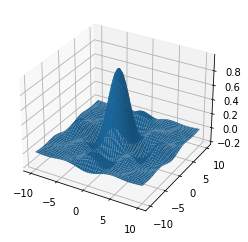

In [22]:
import matplotlib.pyplot as plt

import numpy

x, y, z = makeData()

fig = plt.figure()
axes = fig.add_subplot(projection='3d')

# !!!
axes.plot_surface(x, y, z)
plt.show()

Полученную штуку можно вращать с помощью мышки. Matplotlib не использует графический ускоритель, поэтому вращение происходит довольно медленно, хотя скорость зависит от количества точек на поверхности.

Задание 1.
    1. Задать собственный вариант функции для отображения makeData:
        вариант 1: z = x ** 2 + y ** 2
        вариант 2: z = cos(x/n) + y ** 2 (n = день рождения (число))
        вариант 3: z = x ** 2 + sin(y)
    
    2. Создать данные 
    
    3. построить объект в 3Д


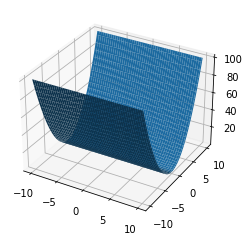

In [26]:
X, Y = np.meshgrid([1,2,3], [4,5,6,7])
def makeData ():
    # Строим сетку в интервале от -10 до 10, имеющую 100 отсчетов по обоим координатам
    x = np.linspace (-10, 10, 100)
    y = np.linspace (-10, 10, 100)

    # Создаем двумерную матрицу-сетку
    xgrid, ygrid = np.meshgrid(x, y)

    # В узлах рассчитываем значение функции
    z = np.cos (xgrid/26) + ygrid**2
    return xgrid, ygrid, z
x, y, z = makeData()

fig = plt.figure()
axes = fig.add_subplot(projection='3d')

# !!!
axes.plot_surface(x, y, z)
plt.show()

## Изменяем внешний вид графика

### Шаг сетки
По умолчанию метод plot_surface() использует разрежение исходных данных, чтобы ускорить отображение. Регулировать степень разрежения (или отключить его) можно с помощью пар именованных параметров, передаваемых в метод plot_surface(). С помощью параметров rcount и ccount можно задать количество отсчетов по двум осям (по строкам и по столбцам в исходных данных соответственно). По умолчанию используются значения rcount = ccount = 50. Давайте это проверим. Для этого изменим в предыдущем примере строку с использованием метода plot_surface() следующим образом:

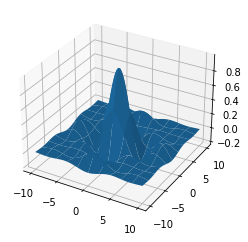

In [7]:

fig = plt.figure()
axes = fig.add_subplot(projection='3d')
#!!!!!
axes.plot_surface(x, y, z, rcount=10, ccount=10)
# !!!

plt.show()

Аналогичных результатов можно добиться, используя пары параметров rstride и cstride. Но если параметры rcount и ccount задавали количество отсчетов по осям, то rstride и cstride задают степень прореженности (децимации) по осям, то есть сколько отсчетом надо пропустить.

Как мы говорили в начале, используется сетка с 50 точками по каждой оси, а поскольку у нас в данных по 100 отсчетов, то это равносильно для наших данных значениям rstride = cstride = 2. Давайте это проверим, изменив вызов метода plot_surface() на следующий:

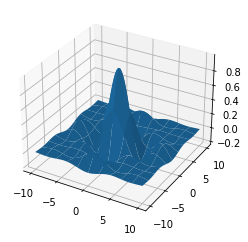

In [8]:

fig = plt.figure()
axes = fig.add_subplot(projection='3d')
#!!!!!
axes.plot_surface(x, y, z, rstride=10, cstride=10)
# !!!

plt.show()


Задание 2.
    
    1. для своей картинки сделать отображение с сеткой 5, 10, 100;

    2.Оценить результат.

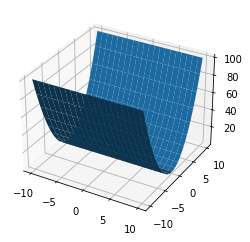

In [27]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')
#!!!!!
axes.plot_surface(x, y, z, rstride=5, cstride=5)
# !!!

plt.show()

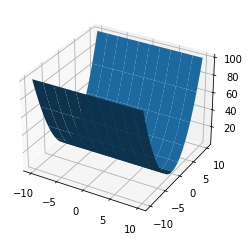

In [28]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')
#!!!!!
axes.plot_surface(x, y, z, rstride=10, cstride=10)
# !!!

plt.show()

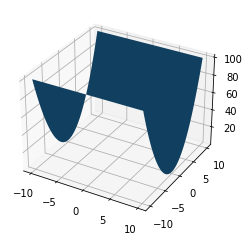

In [29]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')
#!!!!!
axes.plot_surface(x, y, z, rstride=100, cstride=100)
# !!!

plt.show()

## Изменение цвета
Теперь изменим цвет поверхности с помощью параметра color. Этот параметр представляет собой строку, которая описывает цвет. Строка цвета может задаваться разными способами:

Цвет можно определить английским словом для соответствующего цвета или одной буквой. Таких цветов не много:

'b' или 'blue'
'g' или 'green'
'r' или 'red'
'c' или 'cyan'
'm' или 'magenta'
'y' или 'yellow'
'k' или 'black'
'w' или 'white'
Для примера сделаем поверхность желтой:



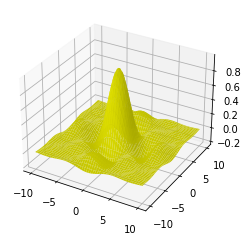

In [9]:

fig = plt.figure()
axes = fig.add_subplot(projection='3d')
#!!!!!

axes.plot_surface(x, y, z, color='yellow')
# !!!

plt.show()

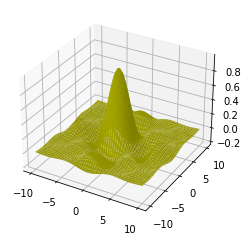

In [10]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')
#!!!!!
axes.plot_surface(x, y, z, color='y')

# !!!

plt.show()

Если нам нужен серый цвет, то его яркость мы можем задать с помощью строки, содержащей число в интервале от 0.0 до 1.0 (0 - белый, 1 - черный). Например, мы можем написать следующую строку:

axes.plot_surface(x, y, z, color='0.7')

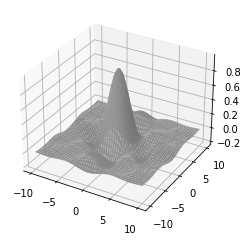

In [11]:

fig = plt.figure()
axes = fig.add_subplot(projection='3d')
#!!!!!
axes.plot_surface(x, y, z, color='0.7')

# !!!

plt.show()

Кроме того мы можем задавать цвет так, как это принято в HTML после символа решетки ('#'). Например, можем задать цвет следующим образом:

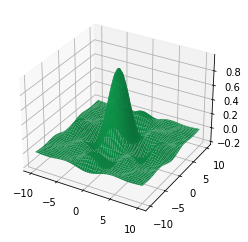

In [12]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')
#!!!!!
axes.plot_surface(x, y, z, color='#11aa55')

# !!!

plt.show()

Использование цветовых карт (colormap)
Цветовые карты используются, если нужно указать в какие цвета должны окрашиваться участки трехмерной поверхности в зависимости от значения Z в этой области (задание цветового градиента). Тема использование градиентов сама по себе большая и интересная, но мы сейчас рассмотрим только некоторые ее аспекты. Чтобы при выводе графика использовался градиент, в качестве значения параметра cmap (от слова colormap - цветовая карта) нужно передать экземпляр класса matplotlib.colors.Colormap или производного от него.

Следующий пример использует класс LinearSegmentedColormap, производный от Colormap, чтобы создать градиент перехода от синего цвета к красному через белый.



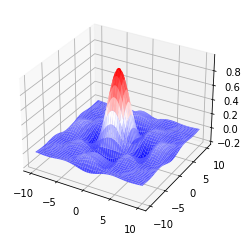

In [13]:
import matplotlib.pyplot as plt

# !!!
from matplotlib.colors import LinearSegmentedColormap

import numpy


def makeData ():
    # Строим сетку в интервале от -10 до 10, имеющую 100 отсчетов по обоим координатам
    x = numpy.linspace (-10, 10, 100)
    y = numpy.linspace (-10, 10, 100)

    # Создаем двумерную матрицу-сетку
    xgrid, ygrid = numpy.meshgrid(x, y)

    # В узлах рассчитываем значение функции
    z = numpy.sin (xgrid) * numpy.sin (ygrid) / (xgrid * ygrid)
    return xgrid, ygrid, z



x, y, z = makeData()

fig = plt.figure()
axes = fig.add_subplot(projection='3d')
# !!!
cmap = LinearSegmentedColormap.from_list ('red_blue', ['b', 'w', 'r'], 256)
axes.plot_surface(x, y, z, color='#11aa55', cmap=cmap)

plt.show()

Здесь для создания цветовой карты используется статический метод from_list(), который принимает три параметра:

Имя создаваемой карты
Список цветов, начиная с цвета для минимального значения на графике (голубой - 'b'), через промежуточные цвета (у нас это белый - 'w') к цвету для максимального значения функции (красный - 'r').
Количество цветовых переходов. Чем это число больше, тем более плавный градиент, но тем больше памяти он занимает.




Если вы не хотите каждый раз создавать свою цветовую карту, то можете воспользоваться одной из уже готовых карт, которые располагаются в модуле matplotlib.cm.

Чтобы узнать какие цветовые карты существуют, можно воспользоваться следующим скриптом:

In [14]:
from matplotlib import cm

print(dir(cm))

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'ColormapRegistry', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'Mapping', 'MutableMapping', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'ScalarMappable', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', '_DeprecatedCmapDictWrapper', '_LUTSIZE', '__builtin_cmaps', '__builtins__', '__cached__', '__doc__', '__file__', '__getattr__', '__loader__', '__name__', '__package__', '__spec__', '_

Как эти цветовые карты выглядят, можно увидеть на этой странице документации https://matplotlib.org/stable/tutorials/colors/colormaps.html#miscellaneous.

Воспользуемся некоторыми из них. Следующий пример строит два трехмерных графика в одном окне. Для левого графика цветовая карта jet, а для правого - Spectral.

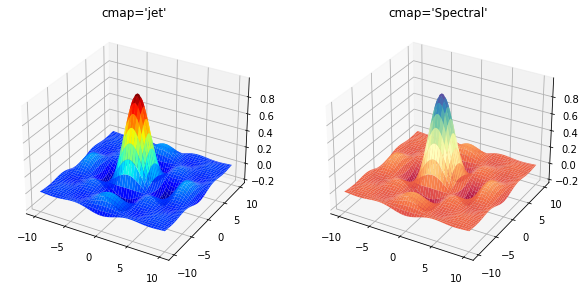

In [15]:
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt

import numpy


def makeData():
    # Строим сетку в интервале от -10 до 10, имеющую 100 отсчетов по обоим координатам
    x = numpy.linspace(-10, 10, 100)
    y = numpy.linspace(-10, 10, 100)

    # Создаем двумерную матрицу-сетку
    xgrid, ygrid = numpy.meshgrid(x, y)

    # В узлах рассчитываем значение функции
    zgrid = numpy.sin(xgrid) * numpy.sin(ygrid) / (xgrid * ygrid)
    return xgrid, ygrid, zgrid



x, y, z = makeData()

fig = plt.figure(figsize=(10, 8))
axes_1 = fig.add_subplot(1, 2, 1, projection='3d')
axes_2 = fig.add_subplot(1, 2, 2, projection='3d')
# !!!
axes_1.plot_surface(x, y, z, cmap='jet')
axes_1.set_title("cmap='jet'")

# !!!
axes_2.plot_surface(x, y, z, cmap='Spectral')
axes_2.set_title("cmap='Spectral'")

plt.show()

Задание 3.
    
    1. для своей картинки сделать отображение цвета в 3х вариантах (3 сабрлота)
  

    2.Сделать картинку с полутоновым отображением (процент серого по дате рождения/50).

    3. Сделать гардиентную закраску объекта


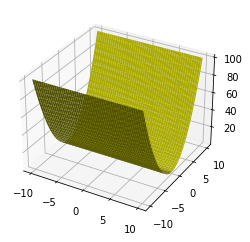

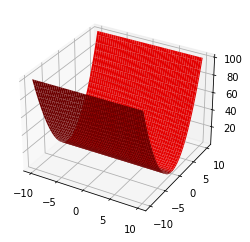

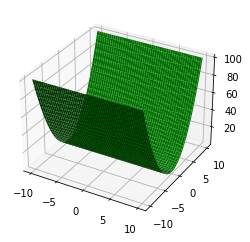

In [35]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')
#!!!!!
axes.plot_surface(x, y, z, color='y')

# !!!

plt.show()

fig = plt.figure()
axes = fig.add_subplot(projection='3d')
#!!!!!
axes.plot_surface(x, y, z, color='r')

# !!!

plt.show()
fig = plt.figure()
axes = fig.add_subplot(projection='3d')
#!!!!!
axes.plot_surface(x, y, z, color='g')

# !!!

plt.show()

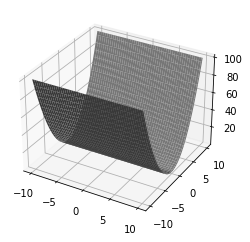

In [36]:

fig = plt.figure()
axes = fig.add_subplot(projection='3d')
#!!!!!
axes.plot_surface(x, y, z, color='0.52')

# !!!

plt.show()

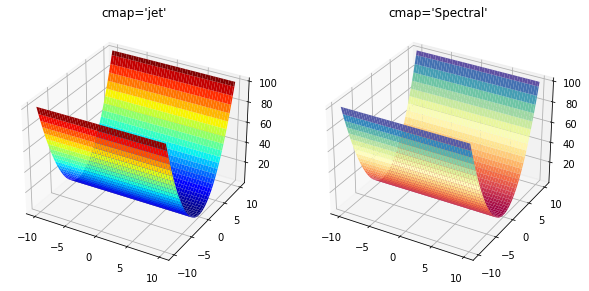

In [38]:
x, y, z = makeData()

fig = plt.figure(figsize=(10, 8))
axes_1 = fig.add_subplot(1, 2, 1, projection='3d')
axes_2 = fig.add_subplot(1, 2, 2, projection='3d')
# !!!
axes_1.plot_surface(x, y, z, cmap='jet')
axes_1.set_title("cmap='jet'")

# !!!
axes_2.plot_surface(x, y, z, cmap='Spectral')
axes_2.set_title("cmap='Spectral'")

plt.show()

## Настройка цвета и толщины линий
Иногда бывает полезно для наглядности сделать более выделяющимися линии сетки трехмерной поверхности. Цвет линий в методе plot_surface() можно задавать с помощью именованного параметра edgecolors, а толщину линий - с помощью параметра linewidth.

Следующий пример делает линии сетки более жирными и черными. Для наглядности сетка в этом примере сделана более редкой с помощью обсуждавшихся выше параметров rcount и ccount, а для раскраски поверхности с помощью параметра cmap задается цветовая карта с именем "jet".

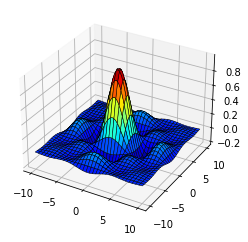

In [16]:
import matplotlib.pyplot as plt

import numpy


def makeData():
    # Строим сетку в интервале от -10 до 10, имеющую 100 отсчетов по обоим координатам
    x = numpy.linspace(-10, 10, 100)
    y = numpy.linspace(-10, 10, 100)

    # Создаем двумерную матрицу-сетку
    xgrid, ygrid = numpy.meshgrid(x, y)

    # В узлах рассчитываем значение функции
    z = numpy.sin(xgrid) * numpy.sin(ygrid) / (xgrid * ygrid)
    return xgrid, ygrid, z


x, y, z = makeData()

fig = plt.figure()
axes = fig.add_subplot(projection='3d')

# !!!
axes.plot_surface(x, y, z, rcount=40, ccount=40, cmap='jet',
                      linewidth=0.5, edgecolors='k')

plt.show()

Задание 4.
    
    1. для своей картинки задать толщину линий при отображении от 0 до 10 (10 свбплотов по вертикали) 
    2.Оценить результат.

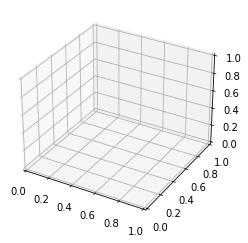

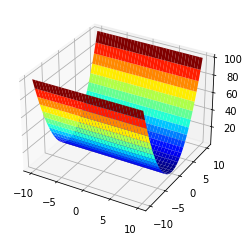

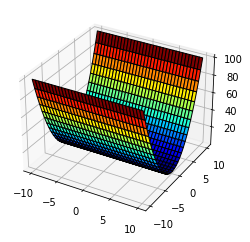

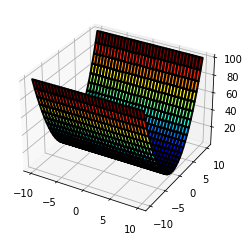

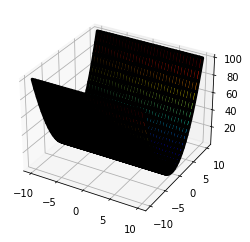

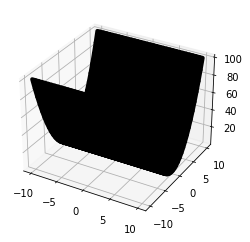

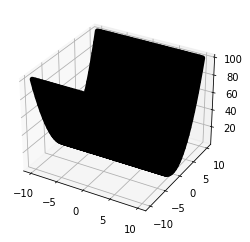

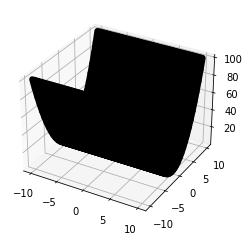

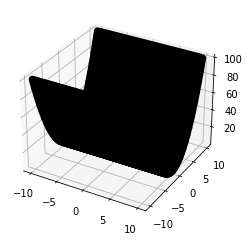

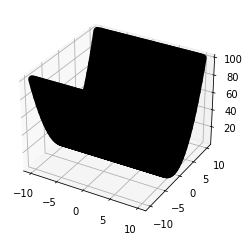

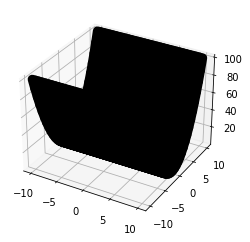

In [45]:
x, y, z = makeData()

fig = plt.figure()
axes = fig.add_subplot(projection='3d')

# !!!
for n in range (0,10):
    x, y, z = makeData()

    fig = plt.figure()
    axes = fig.add_subplot(projection='3d')
    axes.plot_surface(x, y, z, rcount=40, ccount=40, cmap='jet',
                      linewidth=n, edgecolors='k')
plt.show()

### Установка точки наблюдения
Хотя трехмерный график можно вращать с помощью мышки, но также есть возможность установить точку наблюдения, которая будет установлена по умолчанию. По умолчанию точка наблюдения установлена в точке, которая имеет угловые координаты: азимут (azimuth) равен -60°, а угол места (elevation) равен 30°. Для изменения положения точки наблюдения предназначен метод view_init() из класса Axes3D. Этот метод принимает два параметра: elev - угол места и azim - азимут. Оба угла задаются в градусах. Каждый из этих параметров может принимать значение None, в этом случае данная угловая координата будет изменена на значение по умолчанию.

Следующий пример устанавливает значение азимута, равным 0°, а угол места равным 45°. Для большей наглядности оформление графика взято из предыдущего примера, а также добавлены имена осей с помощью методов set_xlabel() и set_ylabel().

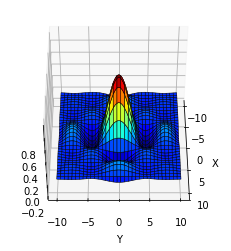

In [17]:
import matplotlib.pyplot as plt

import numpy


def makeData ():
    # Строим сетку в интервале от -10 до 10, имеющую 100 отсчетов по обоим координатам
    x = numpy.linspace (-10, 10, 100)
    y = numpy.linspace (-10, 10, 100)

    # Создаем двумерную матрицу-сетку
    xgrid, ygrid = numpy.meshgrid(x, y)

    # В узлах рассчитываем значение функции
    z = numpy.sin (xgrid) * numpy.sin (ygrid) / (xgrid * ygrid)
    return xgrid, ygrid, z


if 1:
    x, y, z = makeData()

    fig = plt.figure()
    axes = fig.add_subplot(projection='3d')

    # !!!
    axes.plot_surface(x, y, z, cmap='jet', rcount=40, ccount=40,
                      linewidth=0.5, edgecolors='k')
    axes.view_init(elev=45, azim=0)
    axes.set_xlabel('X')
    axes.set_ylabel('Y')

    plt.show()

Также координаты точки наблюдения можно указать при создании осей, передав одноименные параметры в метод add_subplot(), что показано в следующем примере:

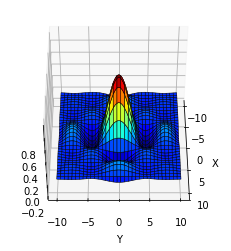

In [18]:

import matplotlib.pyplot as plt

import numpy


def makeData ():
    # Строим сетку в интервале от -10 до 10, имеющую 100 отсчетов по обоим координатам
    x = numpy.linspace (-10, 10, 100)
    y = numpy.linspace (-10, 10, 100)

    # Создаем двумерную матрицу-сетку
    xgrid, ygrid = numpy.meshgrid(x, y)

    # В узлах рассчитываем значение функции
    z = numpy.sin (xgrid) * numpy.sin (ygrid) / (xgrid * ygrid)
    return xgrid, ygrid, z


if 1:
    x, y, z = makeData()

    fig = plt.figure()

    # !!!
    axes = fig.add_subplot(projection='3d', elev=45, azim=0)

    # !!!
    axes.plot_surface(x, y, z, cmap='jet', rcount=40, ccount=40,
                      linewidth=0.5, edgecolors='k')
    axes.set_xlabel('X')
    axes.set_ylabel('Y')
    plt.show()


Азимут отсчитывается не от оси X, которая начинается в начале координат, в сторону оси Y, а от линии, параллельной оси X, которая исходит из центра трехмерной фигуры, этот угол также отсчитывается в сторону оси Y. А угол места отсчитывается не от плоскости OXY, которая проходит через плоскость Z = 0, а от нижней плоскости осей для данной трехмерной фигуры. Чтобы это показать, в следующем примере отображаемая функция смещена по осям Y и Z, но при этом азимут и угол места заданы, как в предыдущем примере. То есть система координат для положения точки наблюдения привязана не к началу системы координат графика, а к отображаемой области, что в общем-то логично с точки зрения пользователя.


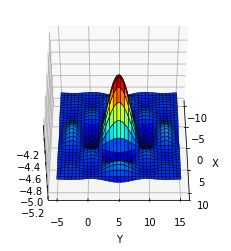

In [19]:
import matplotlib.pyplot as plt

import numpy


def makeData ():
    # Строим сетку в интервале от -10 до 10, имеющую 100 отсчетов по обоим координатам
    x = numpy.linspace (-10, 10, 100)
    y = numpy.linspace (-5, 15, 100)

    # Создаем двумерную матрицу-сетку
    xgrid, ygrid = numpy.meshgrid(x, y)

    # В узлах рассчитываем значение функции
    z = numpy.sin (xgrid) * numpy.sin (ygrid - 5) / (xgrid * (ygrid - 5)) - 5
    return xgrid, ygrid, z


if 1:
    x, y, z = makeData()

    fig = plt.figure()
    # !!!
    axes = fig.add_subplot(projection='3d', elev=45, azim=0)

    # !!!
    axes.plot_surface(x, y, z, cmap='jet', rcount=40, ccount=40,
                      linewidth=0.5, edgecolors='k')
    axes.set_xlabel('X')
    axes.set_ylabel('Y')

    plt.show()

Задание 5.
    
    1. для своей картинки задать 3 различных варианта точки наблюдения (вид сбоку, вид сверху, вид снизу от текущего )

    2.Оценить результат.

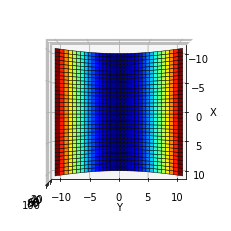

In [49]:
if 1:
    x, y, z = makeData()

    fig = plt.figure()
    axes = fig.add_subplot(projection='3d')

    # !!!
    axes.plot_surface(x, y, z, cmap='jet', rcount=40, ccount=40,
                      linewidth=0.5, edgecolors='k')
    axes.view_init(elev=90, azim=0)
    axes.set_xlabel('X')
    axes.set_ylabel('Y')

    plt.show()

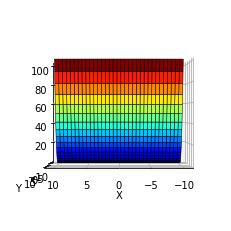

In [48]:
if 1:
    x, y, z = makeData()

    fig = plt.figure()
    axes = fig.add_subplot(projection='3d')

    # !!!
    axes.plot_surface(x, y, z, cmap='jet', rcount=40, ccount=40,
                      linewidth=0.5, edgecolors='k')
    axes.view_init(elev=0, azim=90)
    axes.set_xlabel('X')
    axes.set_ylabel('Y')

    plt.show()

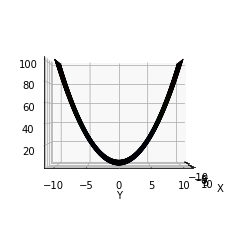

In [58]:
if 1:
    x, y, z = makeData()

    fig = plt.figure()
    axes = fig.add_subplot(projection='3d')

    # !!!
    axes.plot_surface(x, y, z, cmap='jet', rcount=40, ccount=40,
                      linewidth=0.5, edgecolors='k')
    axes.view_init(elev=0, azim=0)
    axes.set_xlabel('X')
    axes.set_ylabel('Y')

    plt.show()

## Источник света
Для большей натуралистичности и визуальной привлекательности при построении трехмерных поверхностей используется неравномерное освещение трехмерных объектов (затенение). Если нужно сделать отображаемый график более "плоским", то затенение можно отключить, и тогда освещенность всех элементов трехмерной поверхности будет одинаковая. Для этого в метод plot_surface() нужно передать именованный параметр shade, равный значению False. Затенение автоматически отключается, если используется цветовая карта, которая устанавливается с помощью параметра cmap.

Следующий пример отображает два трехмерных графика в одном окне, чтобы можно было увидеть разницу между включенным и отключенным затенением.

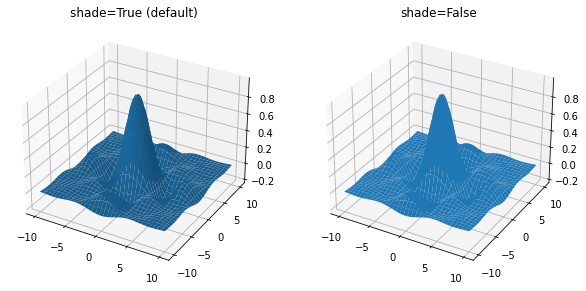

In [20]:

import matplotlib.pyplot as plt

import numpy


def makeData():
    # Строим сетку в интервале от -10 до 10, имеющую 100 отсчетов по обоим координатам
    x = numpy.linspace(-10, 10, 100)
    y = numpy.linspace(-10, 10, 100)

    # Создаем двумерную матрицу-сетку
    xgrid, ygrid = numpy.meshgrid(x, y)

    # В узлах рассчитываем значение функции
    z = numpy.sin(xgrid) * numpy.sin(ygrid) / (xgrid * ygrid)
    return xgrid, ygrid, z


if 1:
    x, y, z = makeData()

    fig = plt.figure(figsize=(10, 8))
    axes_shade = fig.add_subplot(1, 2, 1, projection='3d')
    axes_no_shade = fig.add_subplot(1, 2, 2, projection='3d')

    axes_shade.plot_surface(x, y, z, rcount=40, ccount=40, shade=True)
    axes_shade.set_title("shade=True (default)")

    axes_no_shade.plot_surface(x, y, z, rcount=40, ccount=40, shade=False)
    axes_no_shade.set_title("shade=False")

    plt.show()

Если используется затенение, то можно установить источник света таким образом, чтобы он освещал поверхность с определенного направления. Чтобы установить источник света, в метод plot_surface() нужно передать параметр lightsource, который должен быть экземпляром класса matplotlib.colors.LightSource. Конструктор этого класса принимает два основных параметра (на самом деле больше, но остальные параметры оставлены только для совместимости со старыми версиями библиотеки): азимут (azdeg) и угол места (altdeg). Все углы задаются в градусах.

Следующий пример показывает разницу в отображении графиков при различных положениях источника света:



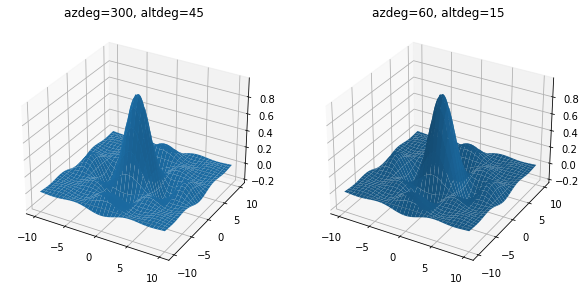

In [21]:
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt

import numpy


def makeData():
    # Строим сетку в интервале от -10 до 10, имеющую 100 отсчетов по обоим координатам
    x = numpy.linspace(-10, 10, 100)
    y = numpy.linspace(-10, 10, 100)

    # Создаем двумерную матрицу-сетку
    xgrid, ygrid = numpy.meshgrid(x, y)

    # В узлах рассчитываем значение функции
    z = numpy.sin(xgrid) * numpy.sin(ygrid) / (xgrid * ygrid)
    return xgrid, ygrid, z


if 1:
    x, y, z = makeData()

    fig = plt.figure(figsize=(10, 8))
    axes_1 = fig.add_subplot(1, 2, 1, projection='3d')
    axes_2 = fig.add_subplot(1, 2, 2, projection='3d')

    light_1 = LightSource(azdeg=300, altdeg=45)
    light_2 = LightSource(azdeg=60, altdeg=15)

    axes_1.plot_surface(x, y, z, rcount=40, ccount=40,
                        lightsource=light_1)
    axes_1.set_title('azdeg=300, altdeg=45')

    axes_2.plot_surface(x, y, z, rcount=40, ccount=40,
                        lightsource=light_2)
    axes_2.set_title('azdeg=60, altdeg=15')

    plt.show()

Задание 6.
    
    1. для своей картинки задать 3 различных варианта точки света (без точечных источников, один точечный источник,2 точечных источника)

    2.Оценить результат.

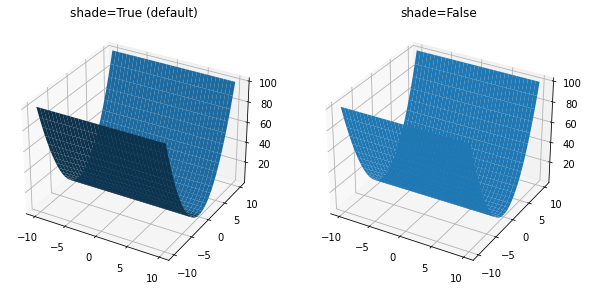

In [59]:
if 1:
    x, y, z = makeData()

    fig = plt.figure(figsize=(10, 8))
    axes_shade = fig.add_subplot(1, 2, 1, projection='3d')
    axes_no_shade = fig.add_subplot(1, 2, 2, projection='3d')

    axes_shade.plot_surface(x, y, z, rcount=40, ccount=40, shade=True)
    axes_shade.set_title("shade=True (default)")

    axes_no_shade.plot_surface(x, y, z, rcount=40, ccount=40, shade=False)
    axes_no_shade.set_title("shade=False")

    plt.show()

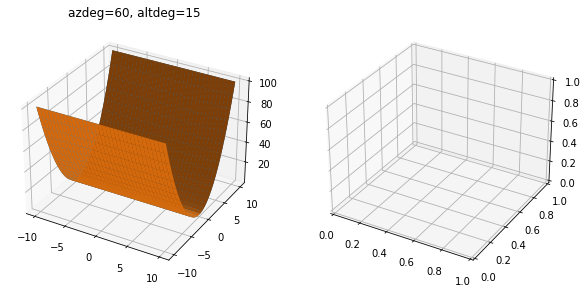

In [61]:
if 1:
    x, y, z = makeData()

    fig = plt.figure(figsize=(10, 8))
    axes_1 = fig.add_subplot(1, 2, 1, projection='3d')
    axes_2 = fig.add_subplot(1, 2, 2, projection='3d')

    light_1 = LightSource(azdeg=300, altdeg=45)
    light_2 = LightSource(azdeg=60, altdeg=15)

    axes_1.plot_surface(x, y, z, rcount=40, ccount=40,
                        lightsource=light_1)
    axes_1.set_title('azdeg=300, altdeg=45')

    axes_1.plot_surface(x, y, z, rcount=40, ccount=40,
                        lightsource=light_2)
    axes_2.set_title('azdeg=60, altdeg=15')

    plt.show()